<h3>Google Play Store App Purchasing Trends</h3>

<p><b>Authors: </b><br>
Bryan Aguiar,
Alberto Lucas,
Emerald Kunkle</p>

<p><b>Introduction:</b><br>
In our final project, we selected the data set Google Play Store Apps from Lavanya on Kaggle. Our goal is to compare the amount of people buying an app with a high rating, to infer if higher rated apps are correlated with a higher likelihood of purchase. The results would be useful for consumers to know when considering an app purchase, and may save money if a user is vesting more of their willingness to purchase on the ratings from others rather than the personal utility they might find with the prospective app.</p>

<p><b>Description of Data Set:</b><br>
Our selected data set is a compiled list of Google Play Store apps and the apps’ statistics in 2019. The data is purely quantitative, consisting of values such as application name, category, rating, number of reviews, size of the application, number of installs, whether or not the app is free, the price of the app (when it is not free), the content rating, and the genres. It is notable that all these values came from the time of the data collection, and may not accurately reflect current values found on the Google Play Store today.</p>

<p><b>Predictions:</b><br>
Our prediction is that there will indeed be a correlation between highly rated apps and the amount of purchases it garnered. This is due to the fact that many people often seek the advice of others when debating whether to make a purchase, and will often use this advice to estimate the reputation of an app developer they are not familiar with.</p>

<p><b>Features used as predictors:</b><br>
The most important data values we will be using in our evaluations is the Installs (number of user downloads/installs for the app), the Type (paid or free), and Rating (as when scraped). The predictors we anticipate is that an app of type “Paid” will have a higher rate of Installs correlated with a higher number of Rating.</p>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
sns.set()
sns.set_context('notebook')

# change default plot size
rcParams['figure.figsize'] = 9,7

<br>
<h3><u> Data Set - googleplaystore.csv </u></h3>
<p><b>Source:</b> 
<a href="https://www.kaggle.com/lava18/google-play-store-apps">https://www.kaggle.com/lava18/google-play-store-apps </a></p>
<p><b>Description:</b> Contains information related to applications offered on the Android Playstore marketplace.</p>

In [3]:
# data file must be downloaded from source and pathname below should reference that file
df = pd.read_csv('googleplaystore.csv')

In [4]:
# All columns/features in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# First few rows of the data set
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<br>
<h3><u> Data Preparation</u> </h3>
<p> To Do:<br>
<i>Add one hot encoding <br>
Shorten app names <br>
Categorize installs</i></p>

In [6]:
#Count how many na values are in each column/feature
print(df.isna().sum())
print("\nTotal na Values: {}".format(df.isna().sum().sum()))

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Total na Values: 1487


In [7]:
# Drop the rows with missing information
previousRows = df.shape[0]
df = df.dropna()
df.reset_index(drop=True, inplace = True)
newRows = df.shape[0]

print("Previous rows:", previousRows)
print("new rows:", newRows)
print("% Change:", (1.0 * (newRows - previousRows) / previousRows) * 100.0)
print("Dropped rows with NA values:", previousRows - newRows)
print("Total current na Values: {}".format(df.isna().sum().sum()))

Previous rows: 10841
new rows: 9360
% Change: -13.661101374411954
Dropped rows with NA values: 1481
Total current na Values: 0


In [8]:
#Convert price column from object to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

#Convert reviews column from object to int
df['Reviews'] = df['Reviews'].astype(int)

#Condensing Multi Genre Categories into new Primary Genre based on first entry
df['Primary_Genre'] = df['Genres'].str.split(';', 1)
df['Primary_Genre'] = df['Primary_Genre'].str.get(0)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_27148/1851724044.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [9]:
#Convert Size column from object to float, and k to M
temp = df['Size'][df['Size'].str.strip().str[-1] == 'M'].str.replace('M', '')
temp = temp.astype(float)
df['Size'][df['Size'].str.strip().str[-1] == 'M'] = temp

temp = df['Size'][df['Size'].str.strip().str[-1] == 'k'].str.replace('k', '')
temp = temp.astype(float) / 1000
df['Size'][df['Size'].str.strip().str[-1] == 'k'] = temp

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_27148/3665844299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][df['Size'].str.strip().str[-1] == 'M'] = temp
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_27148/3665844299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][df['Size'].str.strip().str[-1] == 'k'] = temp


In [10]:
#Update 'varies with device' sizes to the average size of their category
df.loc[df['Size'] == 'Varies with device', 'Size'] = None
df['Size'] = df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'))

In [11]:
#Change data types to category
categories = ['Type', 'Content Rating', 'Installs']
for col in categories:
    df[col] = df[col].astype('category')

In [12]:
#Remove columns not related to research question
df.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Primary_Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.00000,"10,000+",Free,0.0,Everyone,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.00000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.70000,"5,000,000+",Free,0.0,Everyone,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.00000,"50,000,000+",Free,0.0,Teen,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.80000,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.60000,500+,Free,0.0,Everyone,Education,Education
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53.00000,"5,000+",Free,0.0,Everyone,Education,Education
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.60000,100+,Free,0.0,Everyone,Education,Education
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14.38625,"1,000+",Free,0.0,Mature 17+,Books & Reference,Books & Reference


In [13]:
#Add min installs and max installs columns -> This is the 'installs' column as two ints representing a range
df['min Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
multiplicationFactor = np.where(df['Installs'].str[0].astype(int) % 5 == 0, 2, 5)
df['min Installs'] = df['min Installs'].astype(np.int64)
df['max Installs'] = df['min Installs'] * multiplicationFactor - 1
df[['Installs', 'min Installs', 'max Installs']].head()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_27148/3678096520.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['min Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


,Installs,min Installs,max Installs
0,"10,000+",10000,49999
1,"500,000+",500000,999999
2,"5,000,000+",5000000,9999999
3,"50,000,000+",50000000,99999999
4,"100,000+",100000,499999


</br>
<h3><u> Data Exploration & Visualization</u> </h3>
<p> To Do:<br>
<i>Fix crowded x-axis on some graphs <br>
Make a grid exploring several features at once <br>
Add other types of plots (scatter, violin, etc) <br>
Create polynomial features<br>
Sort free from paid apps<br>
Condense features if possible</i></p>

In [14]:
#Description of the data
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Rating,Reviews,Size,Price,min Installs,max Installs
count,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00
mean,4.19,514376.71,22.50,0.96,17908749.14,72074495.22
std,0.52,3145023.26,21.67,15.82,91266365.19,411108016.64
min,1.00,1.00,0.01,0.00,1.00,4.00
25%,4.00,186.75,6.60,0.00,10000.00,49999.00
50%,4.30,5955.00,16.00,0.00,500000.00,999999.00
75%,4.50,81627.50,30.00,0.00,5000000.00,9999999.00
max,5.00,78158306.00,100.00,400.00,1000000000.00,4999999999.00


In [15]:
#Description of paid applications
df[df['Type'] == 'Paid'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Rating,Reviews,Size,Price,min Installs,max Installs
count,645.00,645.00,645.00,645.00,645.00,645.00
mean,4.27,14476.89,20.55,13.95,113010.20,525730.49
std,0.55,134697.87,21.64,58.79,704667.48,3515047.27
min,1.00,1.00,0.01,0.99,1.00,4.00
25%,4.10,33.00,3.80,1.99,1000.00,4999.00
50%,4.40,214.00,13.00,2.99,5000.00,9999.00
75%,4.60,2311.00,30.16,4.99,50000.00,99999.00
max,5.00,2376564.00,100.00,400.00,10000000.00,49999999.00


In [16]:
#Description of free applications
df[df['Type'] == 'Free'].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Rating,Reviews,Size,Price,min Installs,max Installs
count,8715.00,8715.00,8715.00,8715.00,8715.00,8715.00
mean,4.19,551374.45,22.64,0.00,19225817.60,77369842.70
std,0.51,3256086.14,21.67,0.00,94450412.25,425572357.38
min,1.00,1.00,0.01,0.00,1.00,4.00
25%,4.00,237.00,6.90,0.00,10000.00,49999.00
50%,4.30,7823.00,16.00,0.00,1000000.00,4999999.00
75%,4.50,96864.50,30.00,0.00,5000000.00,9999999.00
max,5.00,78158306.00,100.00,0.00,1000000000.00,4999999999.00


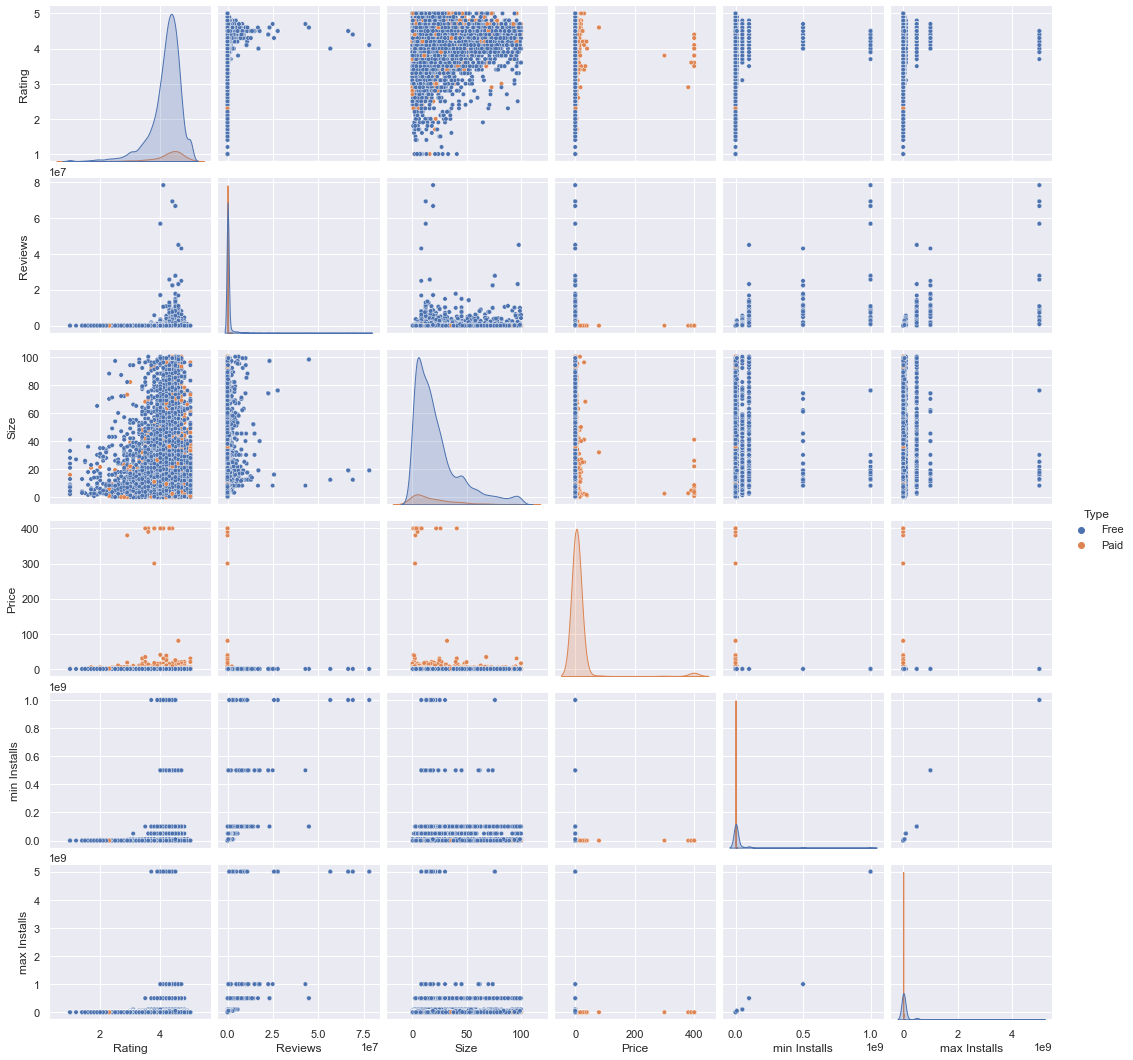

In [17]:
plot = sns.pairplot(df, hue='Type', plot_kws={"s": 20})

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64


[Text(0.5, 1.0, 'Count of Ratings')]

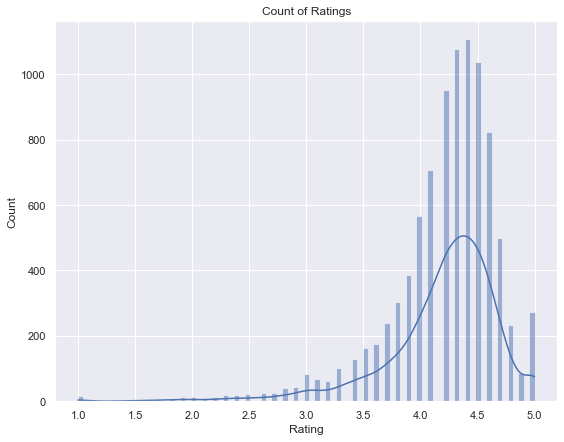

In [18]:
# Show the distribution of all ratings
print(df.Rating.value_counts())
plot = sns.histplot(data=df, x='Rating', kde=True)
plot.set(title='Count of Ratings')

Rating
1.0            28
1.2            44
1.4            98
1.5            61
1.6           691
1.7          2360
1.8          3418
1.9          3781
2.0          2997
2.1          3073
2.2          1979
2.3          2361
2.4         14829
2.5         20184
2.6          4257
2.7         27708
2.8        124890
2.9         57937
3.0        162933
3.1        320836
3.2        228320
3.3       1550176
3.4        958289
3.5       1648536
3.6       1822819
3.7       9978590
3.8      10900396
3.9      14831019
4.0     282617594
4.1     253744045
4.2     220642167
4.3     670892716
4.4    1026002986
4.5    1304281301
4.6     779348285
4.7     208458135
4.8      23590734
4.9       2312993
5.0          2395
Name: Reviews, dtype: int32


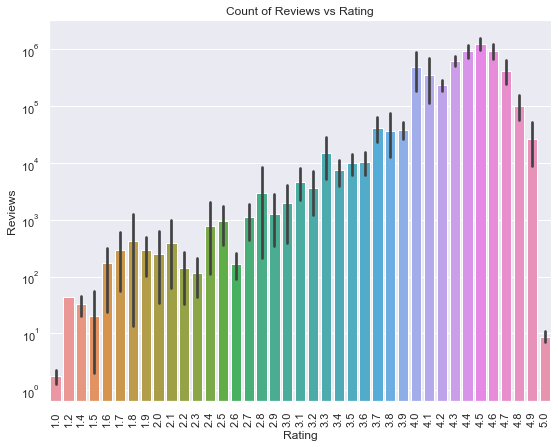

In [19]:
# Show the amount of reviews that apps with a specific rating have
print(df.groupby('Rating')['Reviews'].sum())
plot = sns.barplot(data=df, x='Rating', y='Reviews')
plot.set(title='Count of Reviews vs Rating')
plt.xticks(rotation=90)
plt.yscale('log')

Primary_Genre
Communication    815465277
Social           621241091
Casual           458699059
Action           352647446
Arcade           343093802
Strategy         327369706
Tools            273180158
Photography      213516607
Sports           194397351
Shopping         115041033
Name: Reviews, dtype: int32


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Communication'),
  Text(1, 0, 'Social'),
  Text(2, 0, 'Casual'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Arcade'),
  Text(5, 0, 'Strategy'),
  Text(6, 0, 'Tools'),
  Text(7, 0, 'Photography'),
  Text(8, 0, 'Sports'),
  Text(9, 0, 'Shopping')])

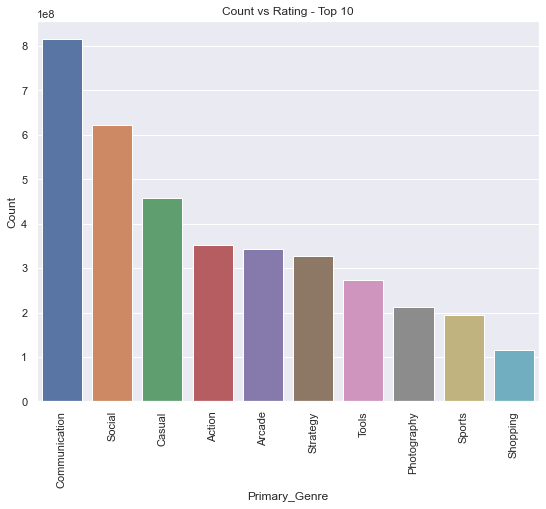

In [20]:
# Examine how many reviews each genre has
query = df.groupby('Primary_Genre')['Reviews'].sum().sort_values(ascending=False)[:10]
print(query)

plot = sns.barplot(x=query.index, y=query.values)
plot.set(title='Count vs Rating - Top 10', ylabel='Count')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Art & Design'),
  Text(1, 0, 'Auto & Vehicles'),
  Text(2, 0, 'Beauty'),
  Text(3, 0, 'Books & Reference'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Comics'),
  Text(6, 0, 'Communication'),
  Text(7, 0, 'Dating'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Events'),
  Text(11, 0, 'Finance'),
  Text(12, 0, 'Food & Drink'),
  Text(13, 0, 'Health & Fitness'),
  Text(14, 0, 'House & Home'),
  Text(15, 0, 'Libraries & Demo'),
  Text(16, 0, 'Lifestyle'),
  Text(17, 0, 'Adventure'),
  Text(18, 0, 'Arcade'),
  Text(19, 0, 'Casual'),
  Text(20, 0, 'Card'),
  Text(21, 0, 'Action'),
  Text(22, 0, 'Strategy'),
  Text(23, 0, 'Puzzle'),
  Text(24, 0, 'Sports'),
  Text(25, 0, 'Music'),
  Text(26, 0, 'Word'),
  Text(27, 0, 'Racing'),
  Text(28, 

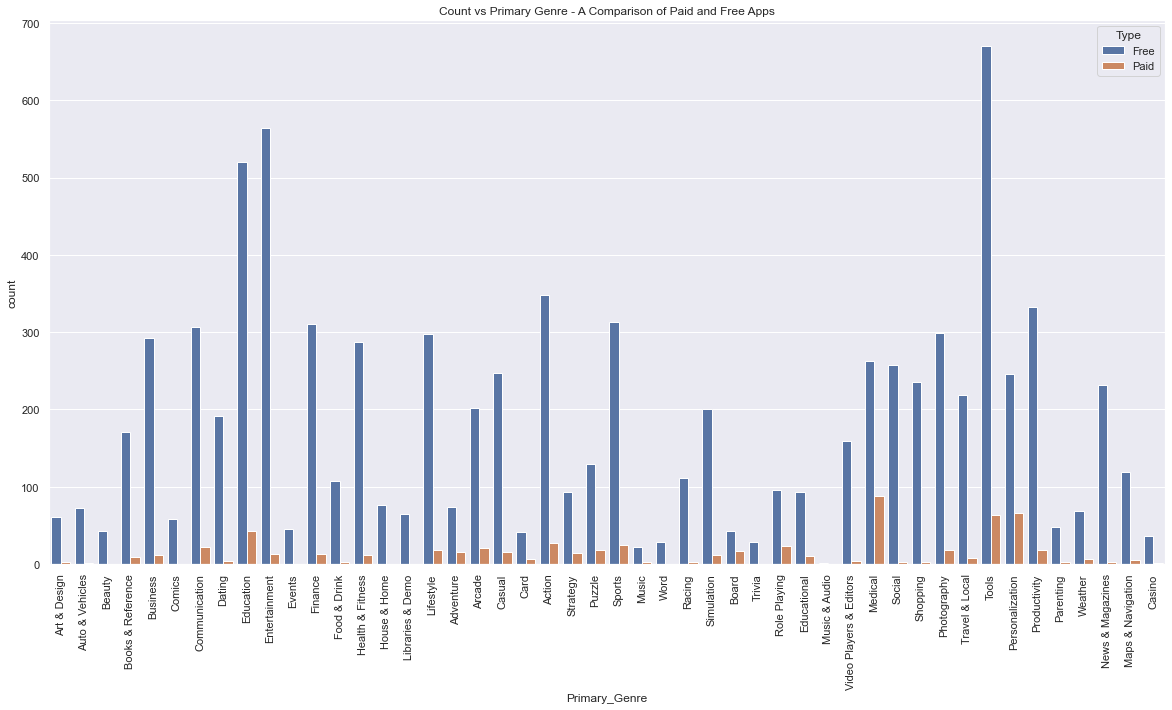

In [21]:
# Examine the count of each genre
rcParams['figure.figsize'] = 20, 10

plot = sns.countplot(data=df, x='Primary_Genre', hue='Type')
plot.set_title('Count vs Primary Genre - A Comparison of Paid and Free Apps')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

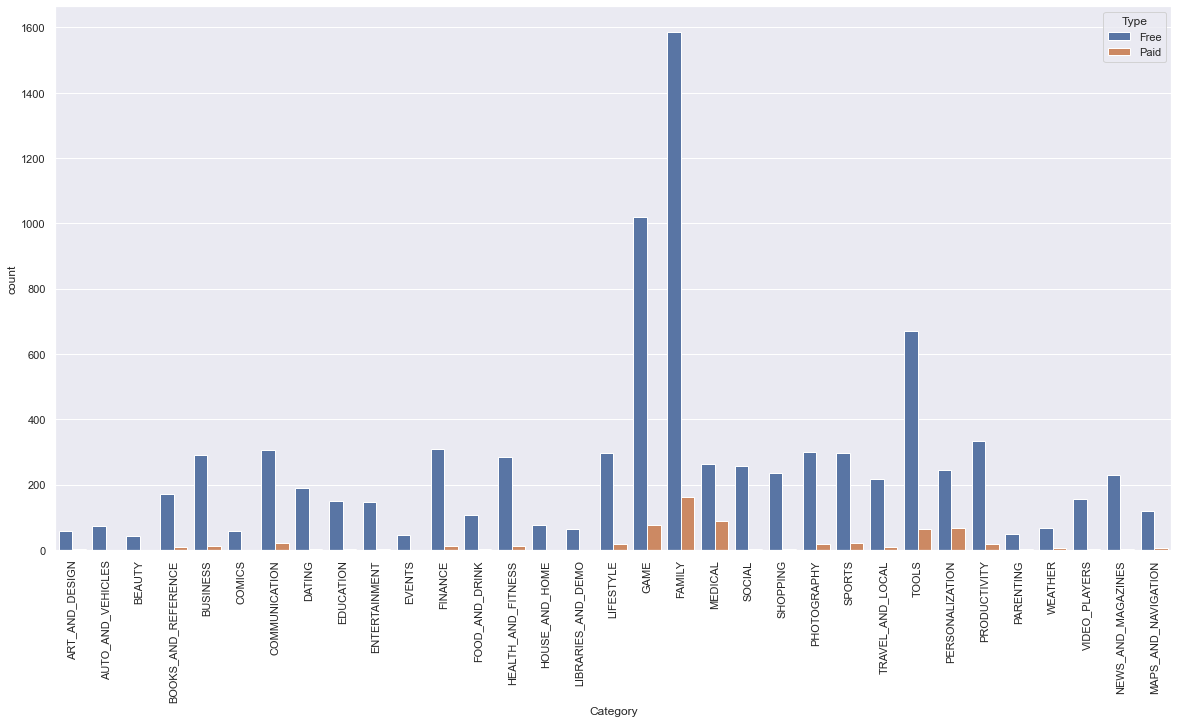

In [22]:
plot = sns.countplot(data=df, x='Category', hue='Type')
plt.xticks(rotation=90)

In [23]:
# change default plot size
rcParams['figure.figsize'] = 9,7

In [24]:
# Shows the count of total apps with the given genre
print(df['Genres'].value_counts())

Tools                      732
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: Genres, Length: 115, dtype: int64


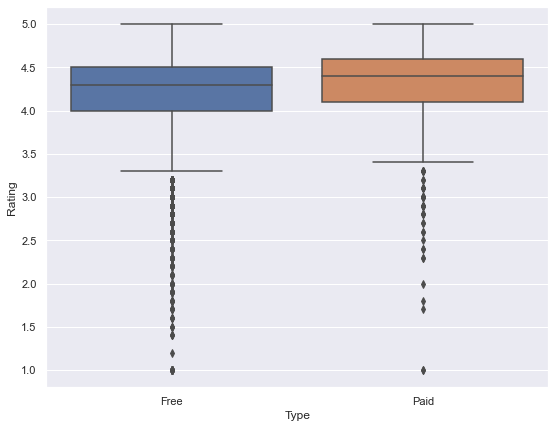

In [25]:
#Boxplot of ratings for free and paid apps
plot = sns.boxplot(data=df, x='Type', y='Rating')

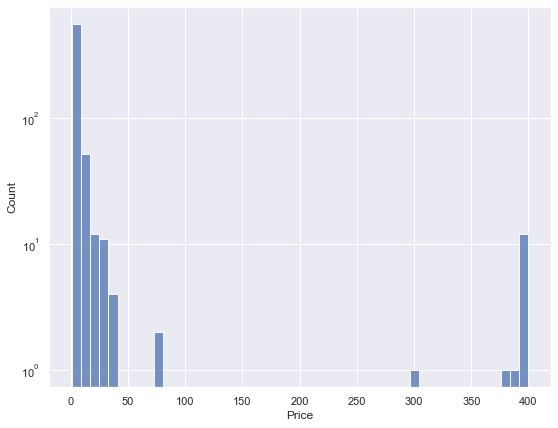

In [26]:
# Take a look at distribution of prices for paid apps
plot = sns.histplot(data=df[df['Type'] == 'Paid'], x='Price', bins = 50)
plt.yscale('log')

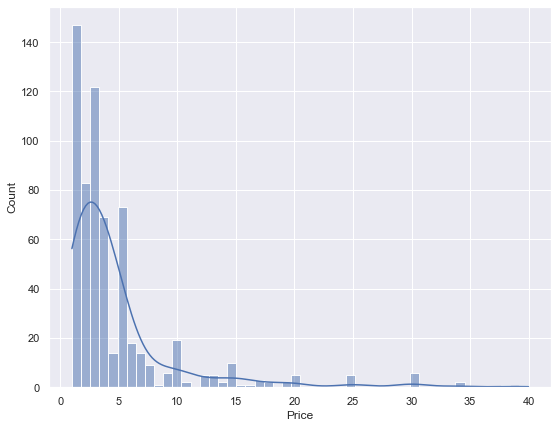

In [27]:
#Most paid apps are under 50 dollars
plot = sns.histplot(data=df[(df['Type'] == 'Paid') & (df['Price'] <= 50)], x='Price', bins = 50, kde=True)

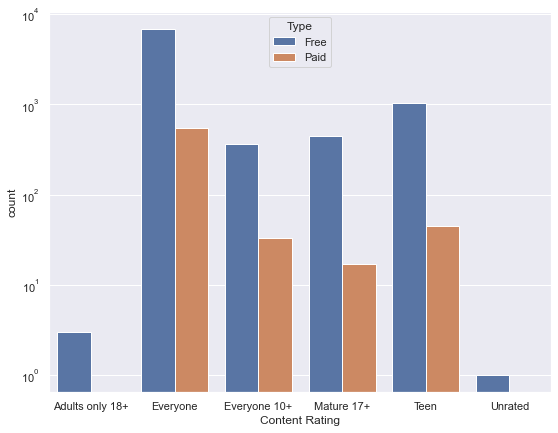

In [28]:
#Show distribution of content rating
sns.countplot(data=df, x='Content Rating', hue='Type')
plt.yscale('log')

<AxesSubplot:xlabel='min Installs', ylabel='Reviews'>

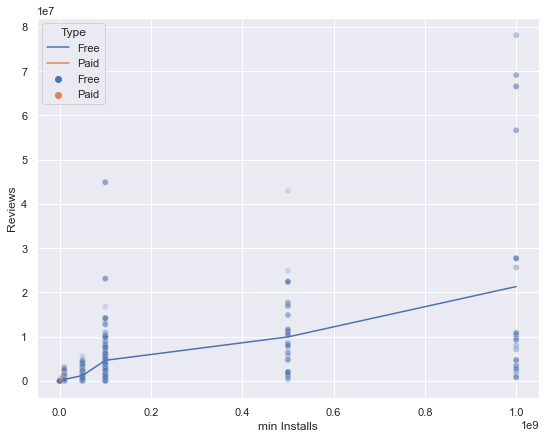

In [29]:
# Compare the review count vs the min installs
sns.scatterplot(data=df, x='min Installs', y='Reviews', hue='Type', alpha=.2)
sns.lineplot(data=df, x='min Installs', y='Reviews', hue='Type', ci=None)

<AxesSubplot:xlabel='min_Installs_log', ylabel='Reviews_log'>

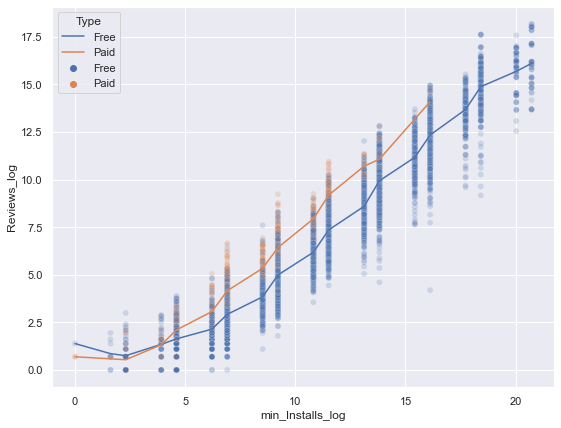

In [30]:
#log transform min installs and reviews and compare the data again
df[['Reviews_log', 'min_Installs_log']] = np.log(df[['Reviews', 'min Installs']])

sns.scatterplot(data=df, x='min_Installs_log', y='Reviews_log', hue='Type', alpha=.2)
sns.lineplot(data=df, x='min_Installs_log', y='Reviews_log', hue='Type', ci=None)

<AxesSubplot:xlabel='Rating', ylabel='Price'>

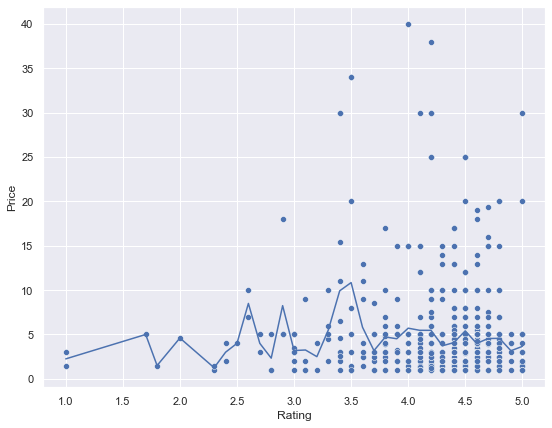

In [31]:
# Compare the price vs the rating (price < 50)
sns.scatterplot(data=df[(df['Type'] == 'Paid') & (df['Price'] <= 50)], x='Rating', y='Price')
sns.lineplot(data=df[(df['Type'] == 'Paid') & (df['Price'] <= 50)], x='Rating', y='Price', ci=None)

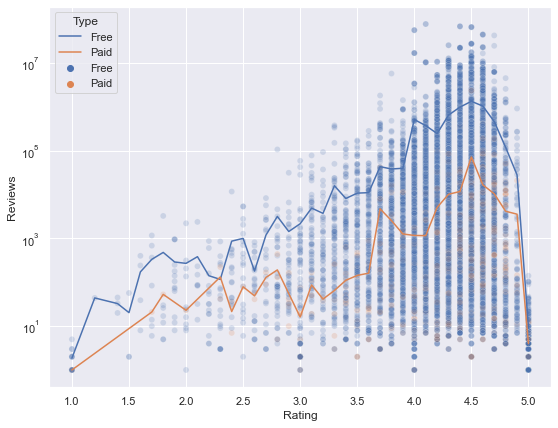

In [32]:
#lineplot of reviews to rating
plot = sns.scatterplot(data=df, x='Rating', y='Reviews', hue='Type', alpha=.2)
plot = sns.lineplot(data=df, x='Rating', y='Reviews', hue='Type', ci=None)
plt.yscale('log')

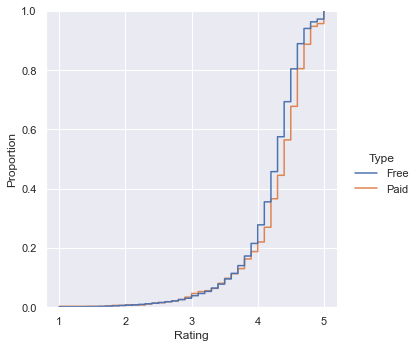

In [33]:
#empirical cumulative distribution function to show proportion of ratings for paid and free apps
sns.displot(data=df, x='Rating', hue='Type', kind='ecdf')

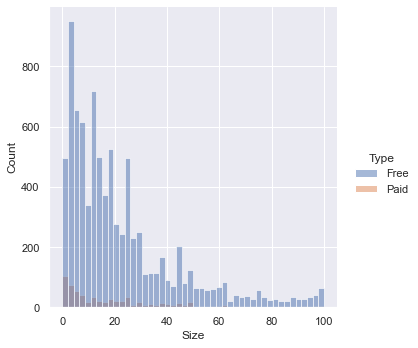

In [34]:
sns.displot(data=df, x='Size', hue='Type')

<h3><u> Machine Learning and Predictions </u></h3>
<p> To Do:<br>
<i>Fix crowded x-axis on some graphs <br>
Debug Errors <br>
Examine various modeling algorithms <br>
Examine test and training rmse<br>
Graph test and training rmse<br>
Examine accuracy of each algorithm used</i></p>

In [36]:
# Function to calculate rmse
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

#Plots predicted vs actual
def plot_actual_predicted(actual, predicted, title):
    # YOUR CODE HERE
    sns.scatterplot(actual, predicted)
    plt.plot([0, 18], [0, 18], color = 'grey', ls='--')
    plt.title(title)
    plt.xlabel('actual')
    plt.ylabel('predicted')

In [46]:
# select the predictor variables and target variables to be used with regression
predictors = ['min_Installs_log']
target = 'Reviews_log'

X = df[predictors].values
y = df[target].values
# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [51]:
rmse_val = []
for i in range(1, 40):
    regr = KNeighborsRegressor(n_neighbors = i)
    regr.fit(X_train, y_train)
    pred_i= regr.predict(X_test)
    test_rmse = rmse(y_test, pred_i)
    rmse_val.append(test_rmse)

Minimum RMSE:- 1.0594788533921724 at K = 30


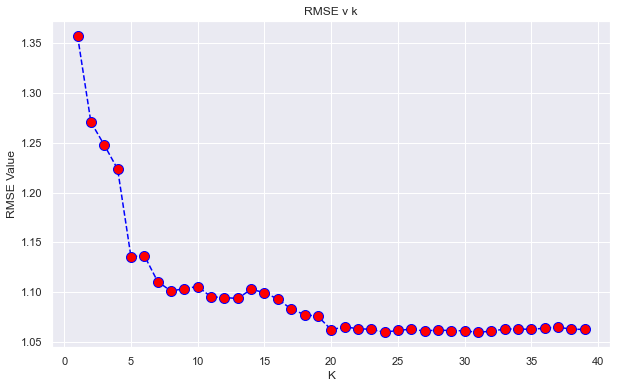

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),rmse_val,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE v k')
plt.xlabel('K')
plt.ylabel('RMSE Value')
print("Minimum RMSE:",min(rmse_val),"at K =",rmse_val.index(min(rmse_val)))

In [38]:
# Needs to be debugged
regr = KNeighborsRegressor(n_neighbors= rmse_val.index(min(rmse_val)))
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
test_rmse = rmse(predicted, y_test)
print('test RMSE, default hyperparameters: {0:.1f}'.format(test_rmse))
print('r-squared value of regr: {:.4f}'.format(regr.score(X_train,y_train)))

test RMSE, default hyperparameters: 1.1
r-squared value of regr: 0.9300


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


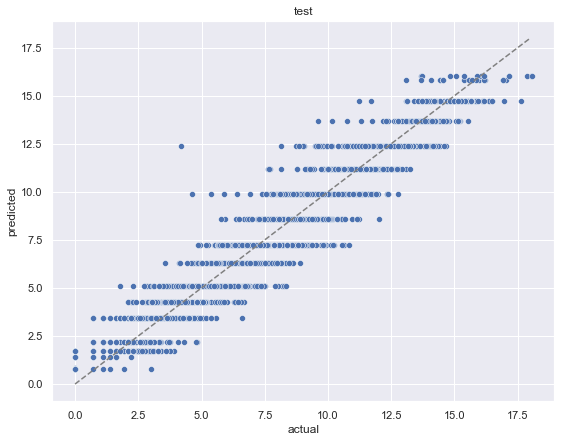

In [39]:
plot_actual_predicted(y_test, predicted, 'test')

In [70]:
predictors = ['min_Installs_log']
target = 'Type'

X = df[predictors].values
y = df[target]

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [72]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.06623931623931624 at K = 3


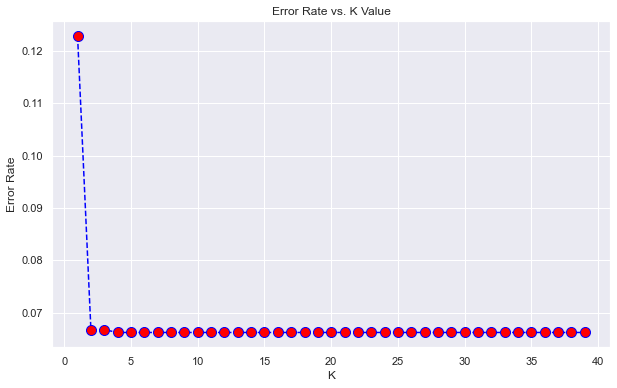

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [74]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.9337606837606838 at K = 3


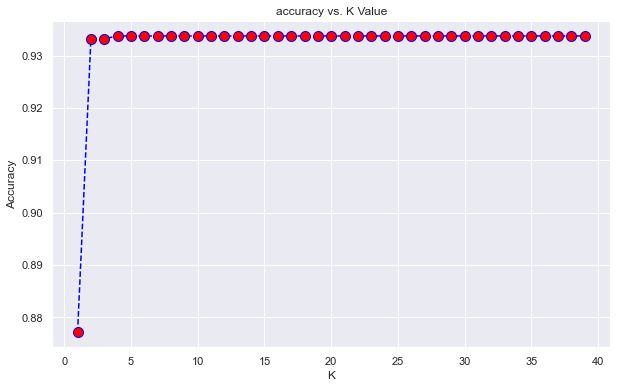

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [76]:
#8 - Use your classification tree to predict whether examples in your test data are public or private.  Compute the confusion matrix and the accuracy of your predictions.
#NEEDS TO BE CONVERTED TO THIS SPECIFIC DATASET

knn = KNeighborsClassifier(n_neighbors = i)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
y_predict = regr.predict(X_test)
print("Accuracy: " + str((y_predict == y_test).mean()))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3g')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Public','Private'])
ax.yaxis.set_ticklabels(['Public','Private'])

Accuracy: 0.0


ValueError: Classification metrics can't handle a mix of binary and continuous targets